<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. A primeira Regressão

--------------------------------

## 1.1 Preparando o ambiente e dataset

------------------

In [4]:
import pandas
import numpy
import scipy
import seaborn
import statsmodels
import statsmodels.api as sm

print(pandas.__version__)
print(numpy.__version__)
print(scipy.__version__)
print(seaborn.__version__)
print(statsmodels.__version__)

2.2.2
2.0.2
1.16.1
0.13.2
0.14.5


- Dados:

In [5]:
dados = pandas.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


- Mesmo dataset que os capítulos anteriores, focados em dados do IBGE

## 1.2. Rodando uma regrassão linear

-----

- Dataset com y sendo o gasto das familia e x é a renda das familias

In [6]:
dataset = {
    'GASTO': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'RENDA': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [7]:
import pandas as pd
dataset = pd.DataFrame(dataset) #transforma os dados acima em um dataset
dataset.head() # mostra os 5 primeiros

,GASTO,RENDA
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [8]:
dataset.describe() #varias estatisticas do dataset

,GASTO,RENDA
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


- Boxplot com os dados:

Text(0.5, 1.0, 'boxplot dados familias')

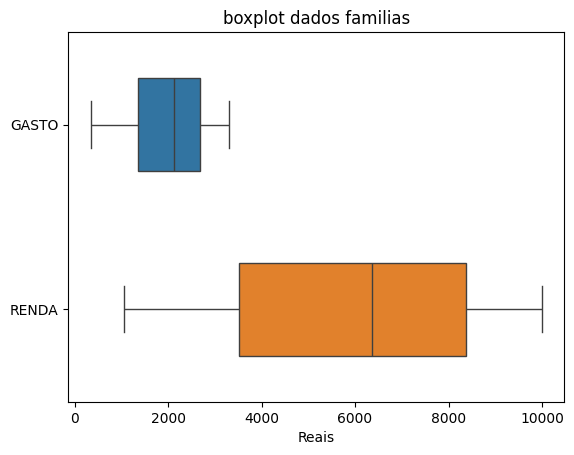

In [9]:
import seaborn as sns
ax = sns.boxplot(data=dataset,orient = 'h', width = 0.5)
ax.set(xlabel='Reais')
ax.set_title("boxplot dados familias")

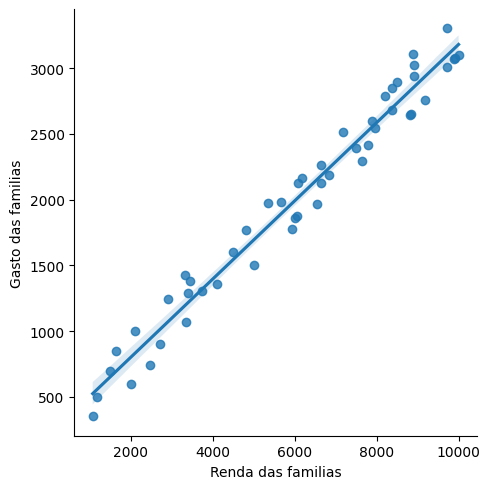

In [10]:
ax = sns.lmplot(x='RENDA', y='GASTO', data=dataset) #plota a regressão apartir do dataset
# Gastos no eixo y e renda no eixo X
ax.set(xlabel='Renda das familias', ylabel='Gasto das familias')

In [11]:
dataset.corr()  #correlação entre as variaveis

,GASTO,RENDA
GASTO,1.000000,0.984835
RENDA,0.984835,1.000000


- Vai de menos -1 a 1 indica o grau de correlação entre eles.

In [12]:
import statsmodels.api as sm

In [13]:
Y = dataset.GASTO # dataframe com o dados de gasto
Y.head()

,GASTO
0,3011
1,1305
2,1879
3,2654
4,2849


In [14]:
x = sm.add_constant(dataset.RENDA) # dataframe com os dados de renda com constante
x.head()

,const,RENDA
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [15]:
resultado_regressao = sm.OLS(Y, x).fit() #Modelo de aplicação da regressao linear
print(resultado_regressao.summary())# todos os parametros estimados da regressao

                            OLS Regression Results                            
Dep. Variable:                  GASTO   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        13:16:39   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

- Fazer o obter resultados de uma previsão:

In [16]:
dataset['Y_previsto'] = resultado_regressao.predict() # faz a predição apartir dos valores acima e salva na coluna y_previsto
dataset

,GASTO,RENDA,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


# 2. Correlação

-------

## 2.1 Covariância

-----------------------

- Covariância é uma medida estatística que indica como duas variáveis variam juntas, mostrando se elas aumentam ou diminuem simultaneamente. Valores positivos indicam variação conjunta na mesma direção, e negativos, em direções opostas.

**Covariância populacional**

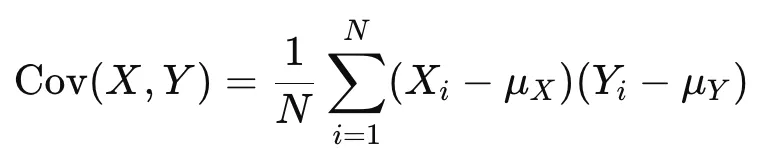



**Covariância Amostral**

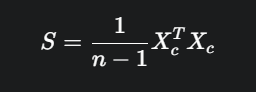

In [17]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101) #pega 20 dados com rendas menor que 5000 no dataset
# do ibge
amostra

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
5051,14,0,39,8,6,1500,1.616243
72082,52,0,29,8,7,1000,1.752518
5521,15,1,21,8,12,3500,1.694016
13849,22,0,49,2,13,1570,1.804156
14285,22,0,29,8,9,600,1.785481
57207,41,1,34,2,12,1200,1.746864
14720,23,0,32,4,12,2000,1.663362
17552,23,0,32,8,6,500,1.693730
49020,35,0,24,6,7,1300,1.656948
2852,13,0,53,8,5,600,1.667109


In [18]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov() #separa os dados de idade, renda, anos de estudo e altura.
# e calcula as covariancias dessas

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


Esta tabela, chamada de matriz de covariância, mostra como as variáveis se relacionam.
Um valor positivo indica que as variáveis tendem a aumentar juntas (ex: Renda e Anos de Estudo).
Um valor negativo indica que quando uma variável aumenta, a outra tende a diminuir (ex: Renda e Idade).
Os valores na diagonal representam a variância, ou seja, a dispersão dos dados de cada variável.

In [19]:
import pandas as pd
import numpy as np


variaveis = amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']]

n = len(variaveis)
dados_centralizados = variaveis - variaveis.mean()
print(dados_centralizados)
covariancia_manual = (dados_centralizados.T @ dados_centralizados) / (n -1)
# Realiza a multiplicação de matrizes entre a transposta dos dados centralizados e a própria matriz.
# O resultado é a "matriz de espalhamento" (scatter matrix), que contém a soma dos produtos cruzados.
# Esta matriz é o numerador da fórmula da covariância, sendo a base para o cálculo da variância/covariância.


# --- Imprima o resultado ---
print("--- Matriz de Covariância Calculada 'na mão' ---")
print(covariancia_manual)

       Idade   Renda  Anos de Estudo    Altura
5051     0.1   246.7            -2.1 -0.086052
72082   -9.9  -253.3            -1.1  0.050223
5521   -17.9  2246.7             3.9 -0.008279
13849   10.1   316.7             4.9  0.101861
14285   -9.9  -653.3             0.9  0.083186
57207   -4.9   -53.3             3.9  0.044569
14720   -6.9   746.7             3.9 -0.038933
17552   -6.9  -753.3            -2.1 -0.008565
49020  -14.9    46.7            -1.1 -0.045347
2852    14.1  -653.3            -3.1 -0.035186
10813  -10.9   246.7            -1.1 -0.023649
20492  -10.9  1746.7             7.9 -0.029197
5695     7.1 -1253.3             3.9  0.083028
32011   19.1  -703.3            -5.1 -0.093218
47340    2.1   246.7             3.9  0.081088
47339    4.1   346.7             0.9 -0.031354
42311   -7.9  -507.3            -7.1 -0.063064
54693   16.1  -253.3            -2.1 -0.016144
11856   13.1 -1253.3            -7.1  0.008491
31171   15.1   146.7            -2.1  0.026541
--- Matriz de

**Variância**

A variância é uma medida de dispersão que indica o quão distantes os valores de um conjunto de dados estão de sua média. Essencialmente, ela representa a média dos quadrados das diferenças entre cada ponto de dado e a média do conjunto. Um valor alto significa que os dados estão muito espalhados; um valor baixo, que estão agrupados.


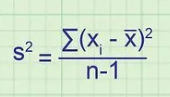

- Fazendo sem nnenhuma bilioteca:

In [20]:
n = len(amostra.Idade)
media = sum(amostra.Idade)/n #media dos valores de idade
soma_dos_quadrados = 0
for i in amostra.Idade:
        soma_dos_quadrados += (i - media) ** 2
variancia = soma_dos_quadrados / (n-1)
print(variancia)

134.4105263157895


In [21]:
print(amostra.Idade.var())
print(amostra.Renda.var())
print(amostra.Altura.var())

134.4105263157895
764668.3263157895
0.003354154161514005


- Bate justamente com os valores das diagonais da matriz de covariancia, exemplo na matriz temos idaide(coluna) e idade (linha) dando justamento o valor de 134.41

## 2.2. Interpretação da covariância


---------

- Quando a covariância tem um valor positivo, temos uma associação linear positiva, onde quando x aumenta y aumenta junto.

- Quando a covariância tem um valor negativo, temos um associação linear negativa, quando x aumenta y cai, Ou seja, relação contrária.

- Teste renda e idade

-4947.968421052631


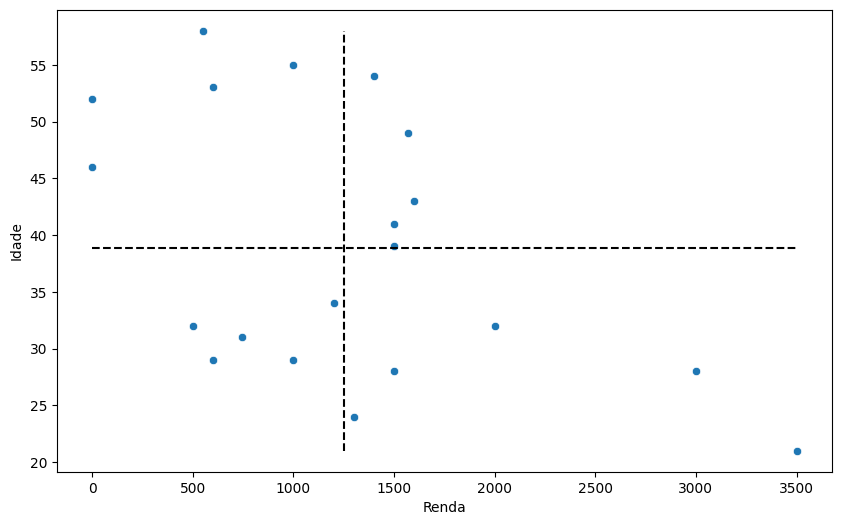

In [22]:
x = amostra.Renda
y = amostra.Idade
covariancia = np.cov(x,y)[0][1]
print(covariancia)
#
ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

 - Temos uma covância e negativo, e tambem no grafico temos um puxamento maior para direita para baixo, o que significa uma covariancia negativa  e relação negativa entre os termos

- Uma relação positiva (pela matriz temos renda e anos de estudo)

2209.021052631579


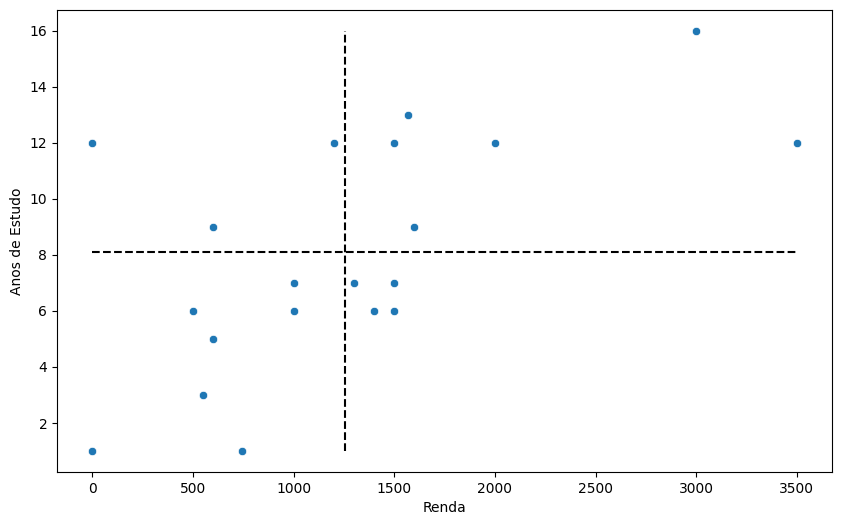

In [23]:
x = amostra.Renda
y = amostra['Anos de Estudo']
covariancia = np.cov(x,y)[0][1]
print(covariancia)

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

- Vemos uma covariancia fortemente positiva e tambem ponto na parte de cima indo para direita indicando claramente uma inclinação positiva.

- Testando uma covariancia nula (pela tabela temos idade e altura sendo praticamente nula)

0.01650587417894737


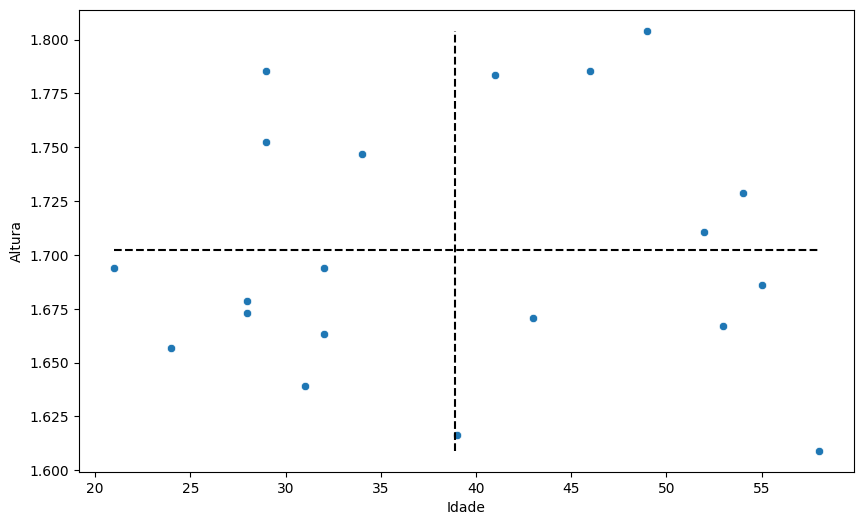

In [24]:
x = amostra.Idade
y = amostra.Altura
covariancia = np.cov(x,y)[0][1]
print(covariancia)

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

- Gráfico extremamente disperso, onde não da para afirmar nada visualmente.

## 2.3. Coeficiente de correlação de Pearson

-----------------

- Coeficiente que varia entre - 1 e  1 e calcula a intensidade da regressão linear, valores entre -1 e 1 indicam relação forte e valores pertos de 0 uma relação mais fraca.

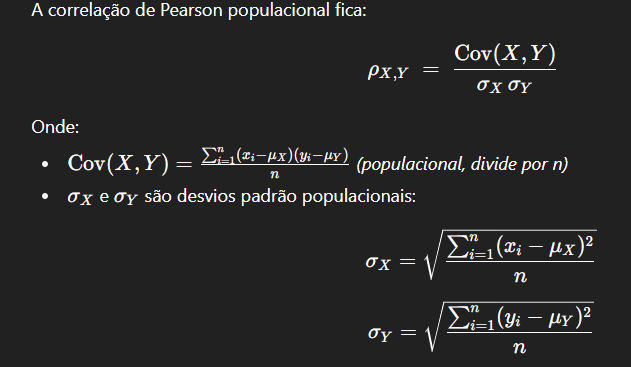

- **Corelação Amostral**

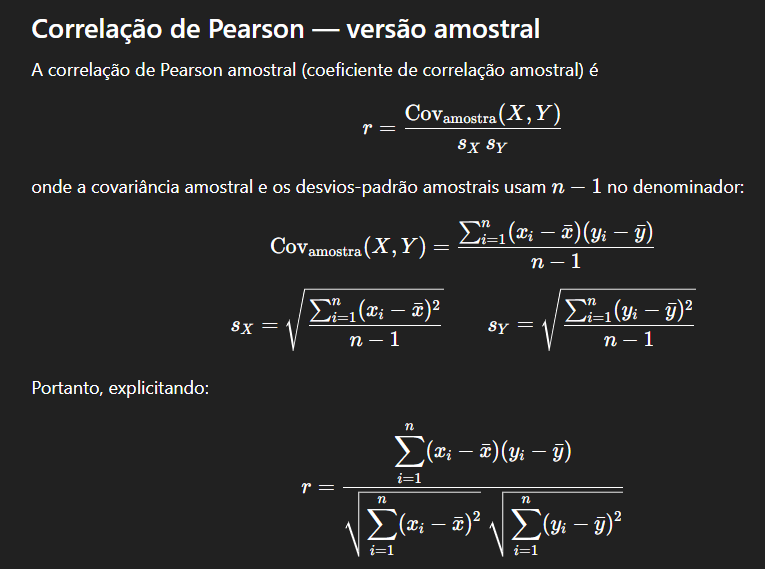

- Para nosso dataset, primeiro vamos achar o s_xy aparitr da amostra tirada acima

In [25]:
s_xy = dados[['Altura', 'Renda']].cov() #covariancia entre altura e renda
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [26]:
s_xy = s_xy.iloc[0,1]
s_xy #acovariancia de xy é igual a yx

np.float64(-1.0789639314252715)

- Achando o s_X (desvio de x) e s_y (desvio de y)

In [27]:
s_x = dados['Altura'].std()
print(s_x)
s_y = dados['Renda'].std()
print(s_y)

0.07971743006825309
3323.3877303470294


- Achando o valor da correlação:

In [28]:
correlação_Pearson = s_xy / (s_x * s_y) # a covariancia de x_y sobre o desvio de x vezes o desvio de y
correlação_Pearson

np.float64(-0.004072608143399512)

- esse valor baixo indica uma regressão praticamente nula.

- fazendo diretamente via pandas

In [29]:
dados[['Altura','Renda']].corr() #faz diretemamente o calculo de correlaçao acima

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


- **TESTE COM O MODELO DE RENDA X GASTOS DO PRIMEIRO DATASET**

In [30]:
dataset = {
    'GASTO': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'RENDA': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [31]:
dataset = pd.DataFrame(dataset) # transformando em dataset
dataset

,GASTO,RENDA
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378
5,1068,3338
6,2892,8507
7,2543,7947
8,3074,9915
9,849,1632


In [32]:
dataset[['GASTO','RENDA']].corr()

,GASTO,RENDA
GASTO,1.000000,0.984835
RENDA,0.984835,1.000000


- Vemos acima uma ALTA correlação entre os dois, quando maior a renda maior o gasto

- Plotanod o grafico:

2178803.5918367337


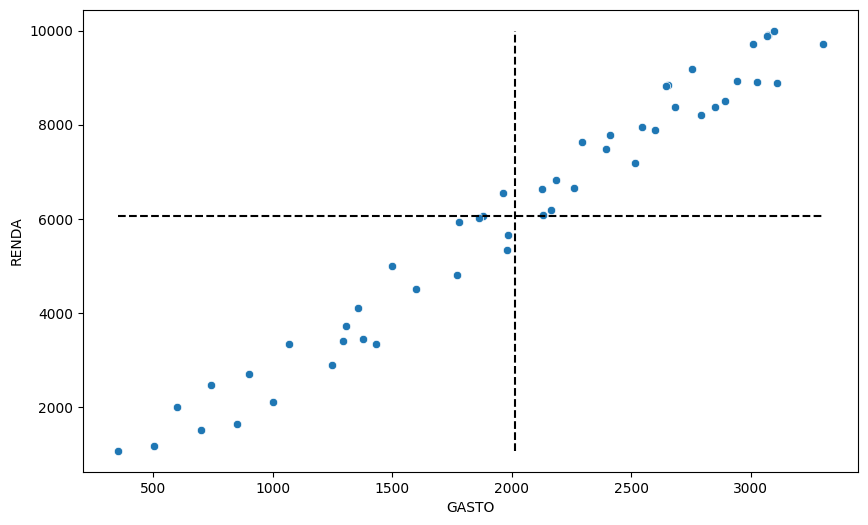

In [33]:
x = dataset.GASTO
y = dataset.RENDA
covariancia = np.cov(x,y)[0][1]
print(covariancia)

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

- vemos uma relação quase que perfeita entre o gasto e renda, quando maior a renda maior o gasto.

- Exercicio:

In [34]:
cov_x_y = 2178803.59
desvio_x = np.sqrt(7328865.59)
desvio_y = np.sqrt(667839.78)

correlaçao_Pearson = cov_x_y / (desvio_x * desvio_y)
correlaçao_Pearson

np.float64(0.9848351973214663)

# 3. Regressão Linear

-------------------------------

## 3.1 Regressão Linear Simples

------

-  A variável prevista é conhecido como variavel dependente (y)

- A variavel utilizada para prever é conhecido como variável independente (x)

**Fórmula Regressão linear simples**

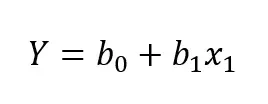

- Y - é o gasto das familias
- x1 - é a renda disponível
- b0 é conhecido como intercepto (consumo quando o rendimento é zero)
- b1 é conhecido como coeficiente angular (propensão marginal a consumir)

 - Em regressão linear simples, o importante é estimar a função de regressão populacional, e estimar valores para b_0 e b_1 apartir do que esta snedo observado em x e y

In [35]:
dataset = {
    'GASTO': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'RENDA': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [36]:
dataset = pd.DataFrame(dataset)
dataset.head(3)

,GASTO,RENDA
0,3011,9714
1,1305,3728
2,1879,6062


- verificar se tem relação linear entre x e y

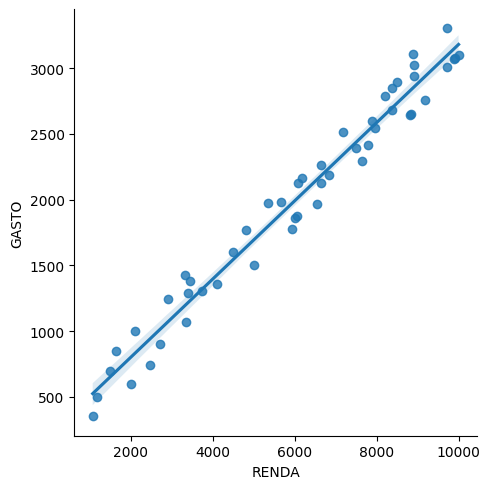

In [37]:
ax = sns.lmplot(x = "RENDA",  y= "GASTO", data = dataset)

- Vemos que sim, se trata de uma regressão linear

- **Matriz de correlação dos dados**

In [38]:
dataset.corr()

,GASTO,RENDA
GASTO,1.000000,0.984835
RENDA,0.984835,1.000000


**achar o termos bo e b1**

- b0 : local onde intercepta o eixo y

- b1 = coeficiente angular da renda

**Erro dos termos em comparacao a reta**

- errro = yi - Esperanca_Y_xi (onde o yi é um ponto qualquer do grafico)

- Regressao linear em sua forma estocastica acrescentando o erro:

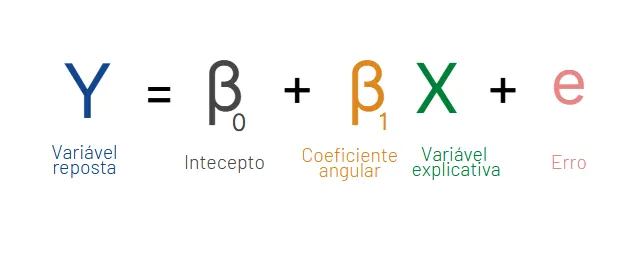

## 3.2. Método de mínimos quadrados

----

- o ideal é minimizar os erros ao maximo, o ideal é que cada termo esteja corretamente na reta.

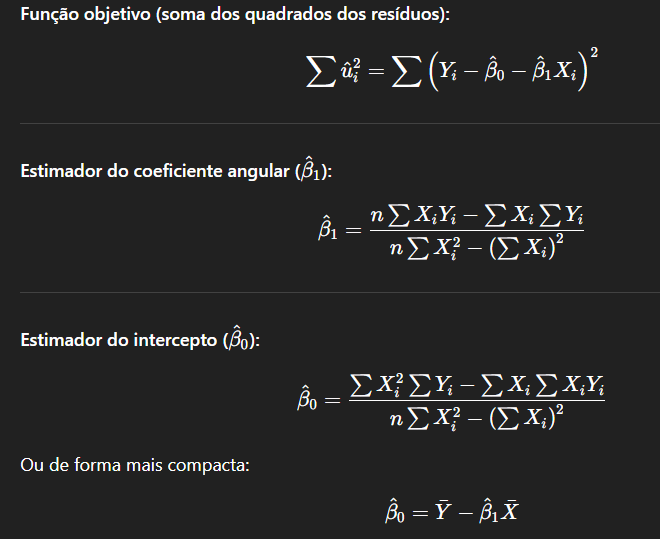

O método dos mínimos quadrados serve para encontrar a reta que melhor se ajusta aos dados, minimizando a soma dos quadrados dos erros (diferença entre valores observados e previstos). Ele é usado para prever valores, identificar relações entre variáveis e reduzir o impacto de erros aleatórios nos dados. É a base da regressão linear.

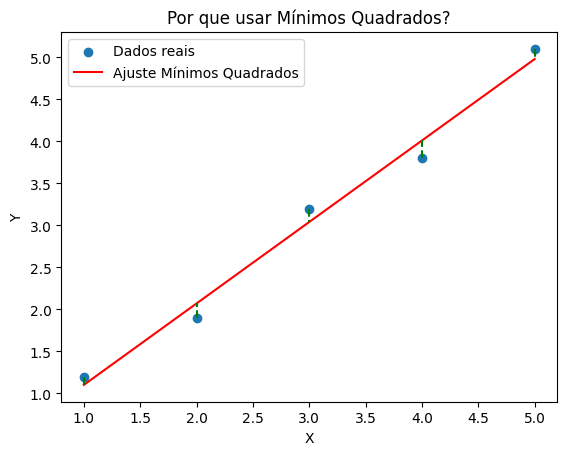

- ### **EXERCICIO PRATICO**

- **Obter n :**

In [39]:
n = len(dataset)
n

50

- **Obter somatório de x**

In [40]:
soma_x = dataset.RENDA.sum()
soma_x

np.int64(303275)

- **Obter o somatório de y**

In [41]:
soma_y = dataset.GASTO.sum()
soma_y

np.int64(100556)

-  **Somatorio de x^2**

In [42]:
dataset['x2'] = dataset.RENDA**2
soma_x2 = dataset.x2.sum()
soma_x2

np.int64(2198628939)

In [43]:
dataset.head(3)

,GASTO,RENDA,x2
0,3011,9714,94361796
1,1305,3728,13897984
2,1879,6062,36747844


- **Somatório de y^2**

In [44]:
dataset['y2'] = dataset.GASTO**2
soma_y2 = dataset.y2.sum()
soma_y2

np.int64(234954332)

In [45]:
dataset.head(3)

,GASTO,RENDA,x2,y2
0,3011,9714,94361796,9066121
1,1305,3728,13897984,1703025
2,1879,6062,36747844,3530641


- **OBTER SOMATORIO DE X VEZES Y**

In [46]:
dataset['xy'] = dataset.RENDA * dataset.GASTO
soma_xy = dataset.xy.sum()
soma_xy

np.int64(716683794)

In [47]:
dataset.head()

,GASTO,RENDA,x2,y2,xy
0,3011,9714,94361796,9066121,29248854
1,1305,3728,13897984,1703025,4865040
2,1879,6062,36747844,3530641,11390498
3,2654,8845,78234025,7043716,23474630
4,2849,8378,70190884,8116801,23868922


- **OBTER B1: (COEFICIENTE ANGULAR)**

In [48]:
# beta1 = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y)) / (n*np.sum(X**2) - (np.sum(X))**2)
b1 = (n*soma_xy - soma_x*soma_y) / (n*soma_x2 - (soma_x)**2)
b1

np.float64(0.29729069099372424)

**OBTER B0: (INTERCEPTOR)**

In [49]:
#b0 =  media de Y - b1* media de x

media_x = dataset.RENDA.mean()
media_y = dataset.GASTO.mean()

b0 = media_y - b1*media_x
b0

np.float64(207.90331377756547)

- ### **OBTENDO OS VALORES DE B0 E B1 VIA PYTHON**

In [50]:
import statsmodels.api as sm

In [51]:
Y = dataset.GASTO
X = sm.add_constant(dataset.RENDA) # adiciona constante junto com os valores de X
print(Y.head())
print(X.head())
#parametros x,y para calculo

0    3011
1    1305
2    1879
3    2654
4    2849
Name: GASTO, dtype: int64
   const  RENDA
0    1.0   9714
1    1.0   3728
2    1.0   6062
3    1.0   8845
4    1.0   8378


- Adiciona uma constante de valor 1 e a segunda coluna sendo os valores x -> Renda.

-  Estimando o modelo

In [52]:
resultado_regressao = sm.OLS(Y,X, missing = 'drop').fit() # o missing drop tirando o valor de x e y sem informação

In [53]:
resultado_regressao.params # parametros do modelo

,0
const,207.903314
RENDA,0.297291


- Encima temos o BO e  abaixo o valor de B1 (coeficiente angular)

- Para passar esses parametros para as variaveis

In [54]:
beta0 = resultado_regressao.params[0]
print(beta0)
beta1 = resultado_regressao.params[1]
print(beta1)

207.90331377756553
0.29729069099372435


/tmp/ipython-input-1677456639.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = resultado_regressao.params[0]
/tmp/ipython-input-1677456639.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = resultado_regressao.params[1]


- ### **Obtendo o intervalo de confiança para os parâmetros estimados**

In [55]:
resultado_regressao.conf_int(alpha = 0.05) #para significancia de 5%

,0,1
const,107.116864,308.689763
RENDA,0.282092,0.312490


- O valor de bo varia de 107 até 308 e o b1 varia de 0.28 até 0.31 com um intervalo de confiança de 5% de confiança;

## 4.3 Obtendo previsões

-------------------

- Nossa regressão linear calculada : Y = 207.90 + 0.2973 X

- Previsões dentro da amostra

In [56]:
dataset['Y_previsto'] = beta0 + beta1*dataset.RENDA
dataset.head() #valor de y previsto em uma nova coluna apartir dos valores calculados anteriormente

,GASTO,RENDA,x2,y2,xy,Y_previsto
0,3011,9714,94361796,9066121,29248854,3095.785086
1,1305,3728,13897984,1703025,4865040,1316.203010
2,1879,6062,36747844,3530641,11390498,2010.079483
3,2654,8845,78234025,7043716,23474630,2837.439476
4,2849,8378,70190884,8116801,23868922,2698.604723


- Y(gasto) são pontos nos nosso grafico, já o y_previsto é o valor da reta que vai passar representando a regressão

- ### **UTILIZANDO PYTHON PARA FAZER A PREVISAO DIRETO**

In [57]:
dataset['Y_previsto_STATS_model'] = resultado_regressao.predict(X)
dataset.head()

,GASTO,RENDA,x2,y2,xy,Y_previsto,Y_previsto_STATS_model
0,3011,9714,94361796,9066121,29248854,3095.785086,3095.785086
1,1305,3728,13897984,1703025,4865040,1316.203010,1316.203010
2,1879,6062,36747844,3530641,11390498,2010.079483,2010.079483
3,2654,8845,78234025,7043716,23474630,2837.439476,2837.439476
4,2849,8378,70190884,8116801,23868922,2698.604723,2698.604723


- Estimando o 'Gasto das Familias' fora da amostra

- ### **Estima um gasto de familia apartir de uma renda aleatoria**

In [58]:
def prever(x):
  return beta0 + beta1 * x #ja temos os valores de beta 1, beta 2

- com os valores de betas basta pedir para usuario por um valor de x que ja é possivel ter um valor de y (gastos simulados)

In [59]:
print(beta0)
print(beta1)

207.90331377756553
0.29729069099372435


In [60]:
prever(7510) #ele irá substituir o x na equação acima por 7510 irá prever o gasto y

np.float64(2440.556403140435)

- via python:


In [61]:
resultado_regressao.predict([1,7510]) #mesmo valor encontrado acima atrave´s do comando predict

array([2440.55640314])

 #  4. Testando os resultados

 ---------------

## 4.1. Resíduos
------

- O resíduo(ui) é a diferença entre o valor observado da variavel e o valor estimado

- U_i = Y_i - ^Y_I (observado - previsto)

In [62]:
dataset['u'] = dataset.GASTO - dataset.Y_previsto #diferença entre o observado e o previsto
dataset.head()

,GASTO,RENDA,x2,y2,xy,Y_previsto,Y_previsto_STATS_model,u
0,3011,9714,94361796,9066121,29248854,3095.785086,3095.785086,-84.785086
1,1305,3728,13897984,1703025,4865040,1316.203010,1316.203010,-11.203010
2,1879,6062,36747844,3530641,11390498,2010.079483,2010.079483,-131.079483
3,2654,8845,78234025,7043716,23474630,2837.439476,2837.439476,-183.439476
4,2849,8378,70190884,8116801,23868922,2698.604723,2698.604723,150.395277


- VIA CODIGO DIRETO (stats_models)

In [63]:
dataset['Residuos regressão'] = resultado_regressao.resid
dataset.head()

,GASTO,RENDA,x2,y2,xy,Y_previsto,Y_previsto_STATS_model,u,Residuos regressão
0,3011,9714,94361796,9066121,29248854,3095.785086,3095.785086,-84.785086,-84.785086
1,1305,3728,13897984,1703025,4865040,1316.203010,1316.203010,-11.203010,-11.203010
2,1879,6062,36747844,3530641,11390498,2010.079483,2010.079483,-131.079483,-131.079483
3,2654,8845,78234025,7043716,23474630,2837.439476,2837.439476,-183.439476,-183.439476
4,2849,8378,70190884,8116801,23868922,2698.604723,2698.604723,150.395277,150.395277


- Vemos que encontra o mesmo valor

In [64]:
dataset.drop(['u'], axis = 1, inplace = True)
dataset.head() #retirando a coluna u para ficar menor o dataset

,GASTO,RENDA,x2,y2,xy,Y_previsto,Y_previsto_STATS_model,Residuos regressão
0,3011,9714,94361796,9066121,29248854,3095.785086,3095.785086,-84.785086
1,1305,3728,13897984,1703025,4865040,1316.203010,1316.203010,-11.203010
2,1879,6062,36747844,3530641,11390498,2010.079483,2010.079483,-131.079483
3,2654,8845,78234025,7043716,23474630,2837.439476,2837.439476,-183.439476
4,2849,8378,70190884,8116801,23868922,2698.604723,2698.604723,150.395277


In [65]:
dataset['Residuos regressão'].mean()

np.float64(-5.525180313270539e-13)

- QUANTO MAIS PERTO ESSE VALOR DE MÉDIA FOR PROXIMO DE 0 MELHOR FOI FEITA A REGRESSÃO

## 4.2 Suposiçoes sobre o termo de u

---------------

1. O termo de erro u é uma variavel com media igual a 0

2. A variancia de u é a mesma para todos os valores de x

3. Os valores de u são independentes

4.  O termo de eerro u é distribuido normalmente

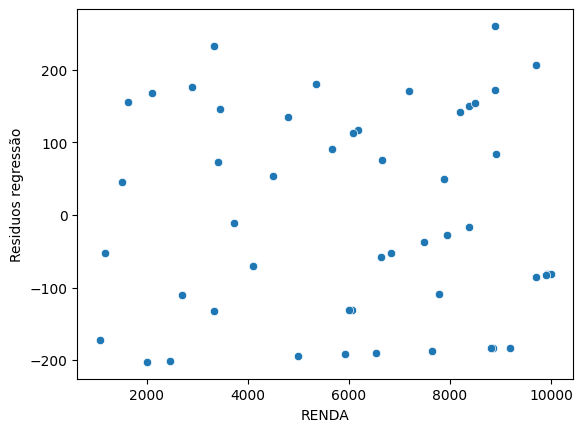

In [66]:
ax = sns.scatterplot(x = dataset.RENDA, y = dataset['Residuos regressão'])

- distribuição toda aleatória, exatamente como é para ser, não tem relação linear entre essa variaveis.

<Axes: xlabel='Y_previsto', ylabel='Residuos regressão'>

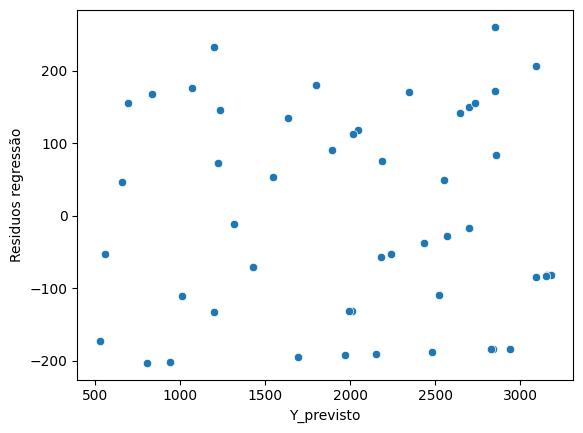

In [67]:
sns.scatterplot(x = dataset['Y_previsto'], y = dataset['Residuos regressão'])

- Totalmente aleatorio tambem, sem dependencia entre um e outro. Sem tendência

- Analisando a variância: (Residuos da regressao ao quadrado)

[Text(0.5, 0, 'Y_previsto')]

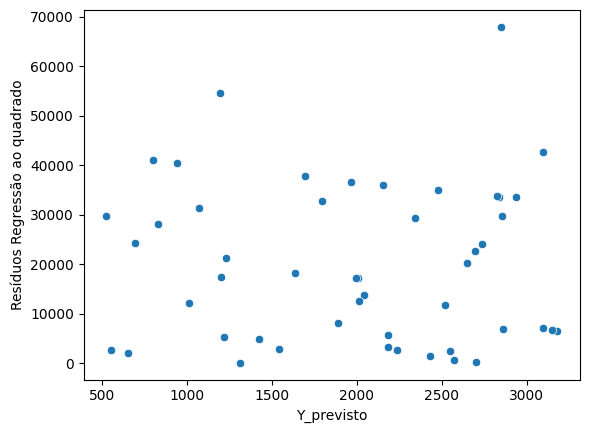

In [68]:
ax = sns.scatterplot(x = dataset['Y_previsto'], y = dataset['Residuos regressão']**2)
ax.set(ylabel = 'Resíduos Regressão ao quadrado')
ax.set(xlabel = 'Y_previsto')

- Indica variáveis constantes. Estaria errado se estivesse em uma das seguintes formas:

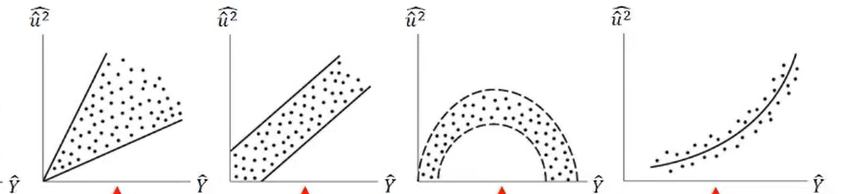

- Esse tipos acima indicam que a variância dos erros não sao constantes.

## 4.3. O coeficiente de determinação R^2


-----------------------

- O coeficiente diz quanto a linha de regressão amostra se ajusta aos dados.

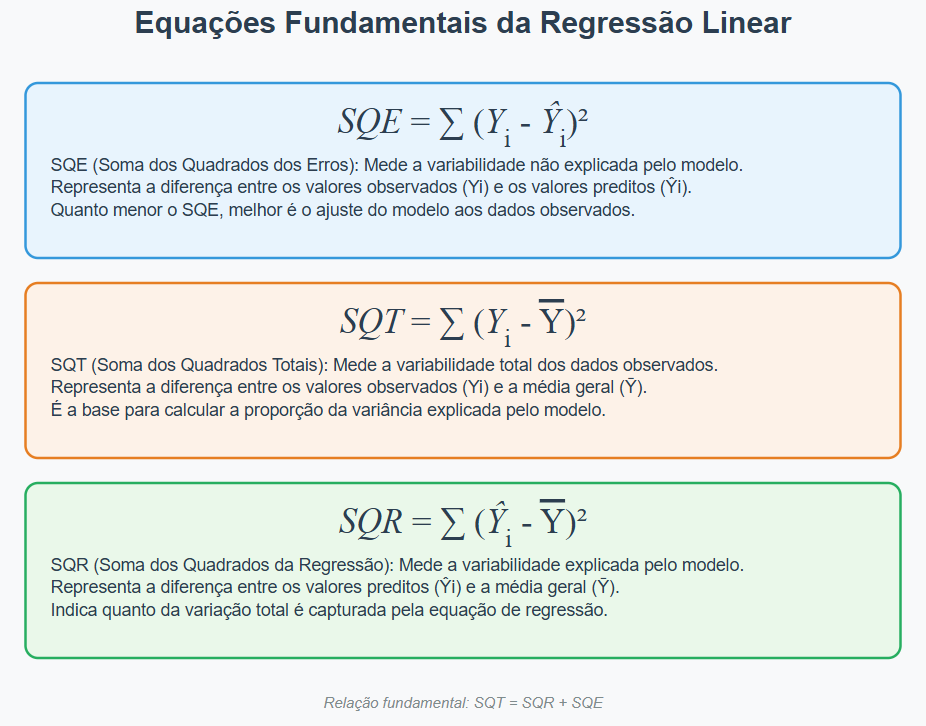

**Soma dos quadrados dos erros (SQE**)

In [69]:
dataset.head()

,GASTO,RENDA,x2,y2,xy,Y_previsto,Y_previsto_STATS_model,Residuos regressão
0,3011,9714,94361796,9066121,29248854,3095.785086,3095.785086,-84.785086
1,1305,3728,13897984,1703025,4865040,1316.203010,1316.203010,-11.203010
2,1879,6062,36747844,3530641,11390498,2010.079483,2010.079483,-131.079483
3,2654,8845,78234025,7043716,23474630,2837.439476,2837.439476,-183.439476
4,2849,8378,70190884,8116801,23868922,2698.604723,2698.604723,150.395277


In [70]:
SQE = ((dataset['GASTO'] - dataset['Y_previsto'] )** 2).sum()
SQE

np.float64(984986.0375191914)

- via codigo:

In [71]:
# usa-se o ssr ( sum of squared residuals) , em ingles
resultado_regressao.ssr #mesmo valor que o achado acima.

np.float64(984986.0375191915)

**Soma do quadrados totais(SQT)**

In [72]:
SQT = ((dataset['GASTO'] - dataset['GASTO'].mean() )** 2).sum()
SQT

np.float64(32724149.279999997)

- Via python:

In [73]:
resultado_regressao.centered_tss #centered_tss da o mesmo valor

np.float64(32724149.279999997)

**Soma do quadrados da Regressão (SQR)**

In [74]:
SQR = ((dataset['Y_previsto'] - dataset['GASTO'].mean() )** 2).sum()
SQR

np.float64(31739163.24248083)

- Via python:

In [75]:
resultado_regressao.ess #mesmo resultado

np.float64(31739163.242480807)

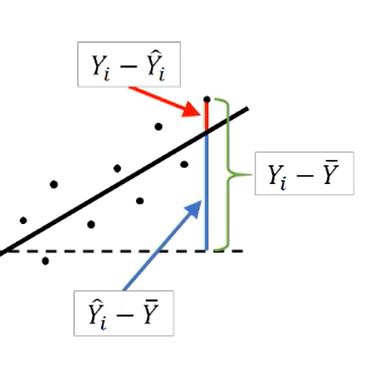

#### Como o $R^2$ é calculado?

O $R^2$ é a razão entre a variação explicada pelo modelo e a variação total.

$R^2 = \frac{SQR}{SQT}$

#### O que os valores de $R^2$ significam?

* **$R^2 = 1$ (ou 100%)**: Perfeito! Isso significa que o seu modelo explicou **toda** a variação dos dados. Neste caso, o $SQE = 0$. Todos os pontos de dados estariam exatamente sobre a linha de regressão. Isso é raro de acontecer na prática.

* **$R^2 = 0$ (ou 0%)**: O modelo **não explica nada** da variação dos dados. Neste caso, o $SQR = 0$. Seu modelo é inútil para prever a variável dependente, e a linha de regressão é basicamente uma linha reta horizontal na média dos dados.

* **$R^2$ entre 0 e 1**: É o que geralmente acontece. Quanto maior o valor de $R^2$ (mais próximo de 1), melhor o ajuste do seu modelo aos dados. Por exemplo:
    * Um $R^2$ de **0,75 (ou 75%)** significa que 75% da variação na sua variável dependente pode ser explicada pelo seu modelo de regressão.
    * Um $R^2$ de **0,20 (ou 20%)** significa que apenas 20% da variação é explicada, o que sugere um ajuste não muito bom.

Em resumo, o **$R^2$ é uma medida de "qualidade do ajuste"** do seu modelo. Ele nos dá um valor percentual que quantifica o quão bem o modelo explica a variação observada nos dados.

In [76]:
R_2 = SQR/SQT
R_2 * 100

np.float64(96.99003317369304)

 - Nesse caso do nosso projeto, temos que o  modelo explica praticamente 97% de  toda a variação dos dados.

- via python:

In [77]:
resultado_regressao.rsquared #mesmo valor do achado acima

np.float64(0.9699003317369297)

## 4.4. Erro quadrático médio
-----

- Testes estatisticos


In [78]:
print(resultado_regressao.summary()) #motra todos os parametro da regreção linear feita
#p_Valor
#intervalo de confiança e entre outros

                            OLS Regression Results                            
Dep. Variable:                  GASTO   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        13:16:42   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

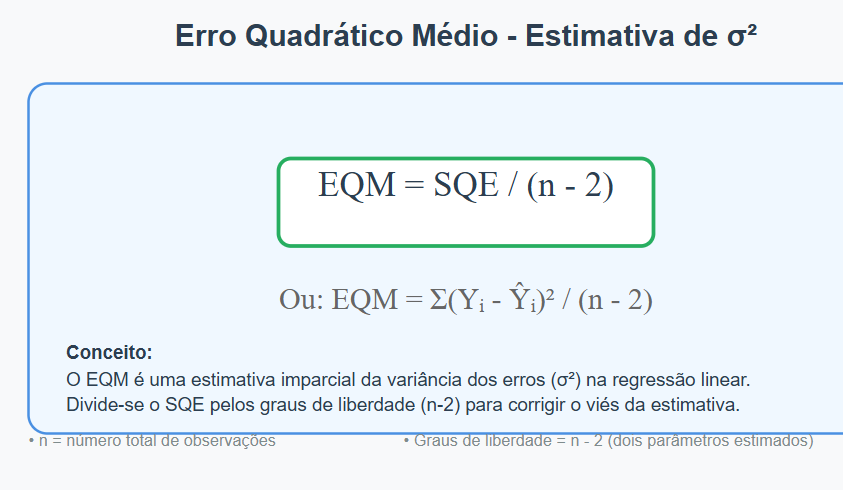

- O erro quadrático médio (EQM ou MSE) serve para medir o quão longe as previsões de um modelo estão dos valores reais, dando mais peso a erros grandes.

- Fazendo passo a passo para reter a ideia:

- **Cálculo do SQE**

In [79]:
SQE = ((dataset['GASTO'] - dataset['Y_previsto'] )** 2).sum()
SQE

np.float64(984986.0375191914)

In [80]:
 n = len(dataset)
 n

50

In [81]:
EQM = SQE / (n-2)
EQM

np.float64(20520.542448316486)

- Via python:

In [82]:
EQM = resultado_regressao.mse_resid
EQM #MESMO RESULTADO QUE ACIMA

np.float64(20520.54244831649)

## 4.5. Teste de significância dos parâmetros

----

- Se as variaveis x e y (gasto e renda) forem linearmente relacionadas, espera-se que B_1 (Coeficiente angular) seja diferente de 0.

-  Para REJEITAR H0 : B1 = 0
-  Para rejeitar H1: B1 diferente de 0

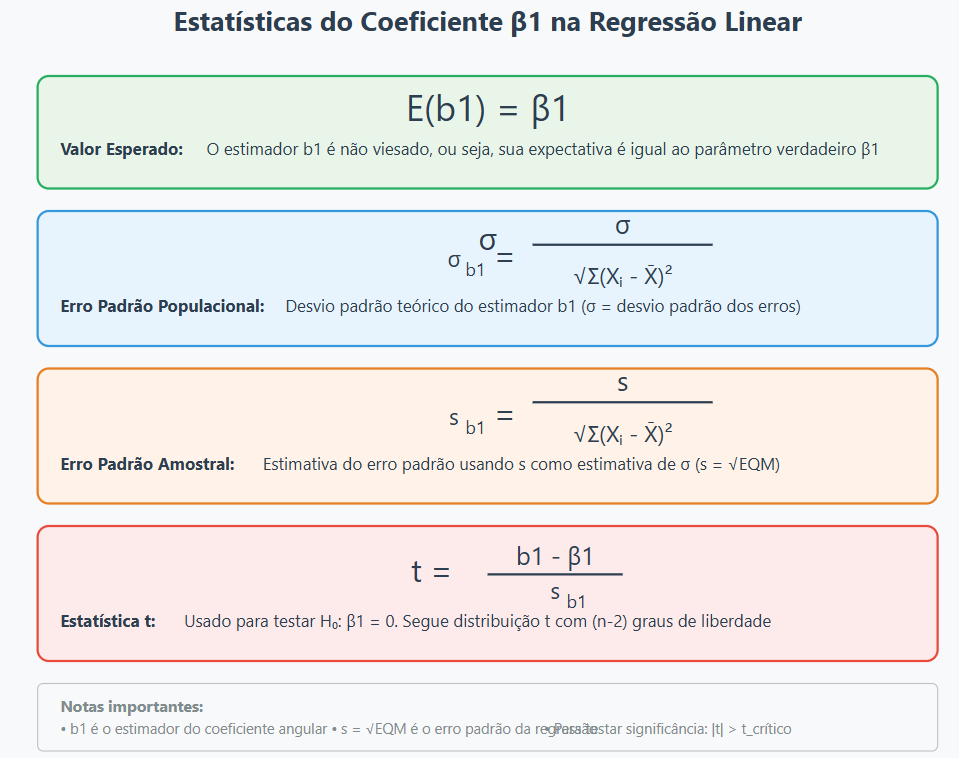

- Logo iremos aplicar o t student para pegar o valor de testes

-  Calculando Sb1

In [83]:
s = np.sqrt(EQM)
s

np.float64(143.24993001155877)

In [84]:
soma_desvio =((dataset.RENDA - dataset.RENDA.mean())**2).sum()
soma_desvio

np.float64(359114426.5)

In [85]:
Sb1 = s / (np.sqrt(soma_desvio))
Sb1

np.float64(0.00755923753376846)

- **DETERMINANDO AREA DE ACEITAÇÃO DE H0**

In [86]:
from scipy.stats import t as t_student

In [87]:
grau_de_liberdade = n - 2
print(grau_de_liberdade)
confianca = 0.95
significancia = 1 -confianca
print(significancia)

48
0.050000000000000044


In [88]:
area_de_probabilidade = confianca + (significancia / 2)
print(area_de_probabilidade)

0.975


In [89]:
from scipy.stats import norm
norm.ppf(area_de_probabilidade)

np.float64(1.959963984540054)

In [90]:
t_alpha = t_student.ppf(area_de_probabilidade, grau_de_liberdade) #recebe a area de probabilidade e o grau de liberdade de parametro
# ainda n é o t estatistico, só serve para eu ver os limites das area
t_alpha

np.float64(2.010634757624232)

**Gráfico da questão**

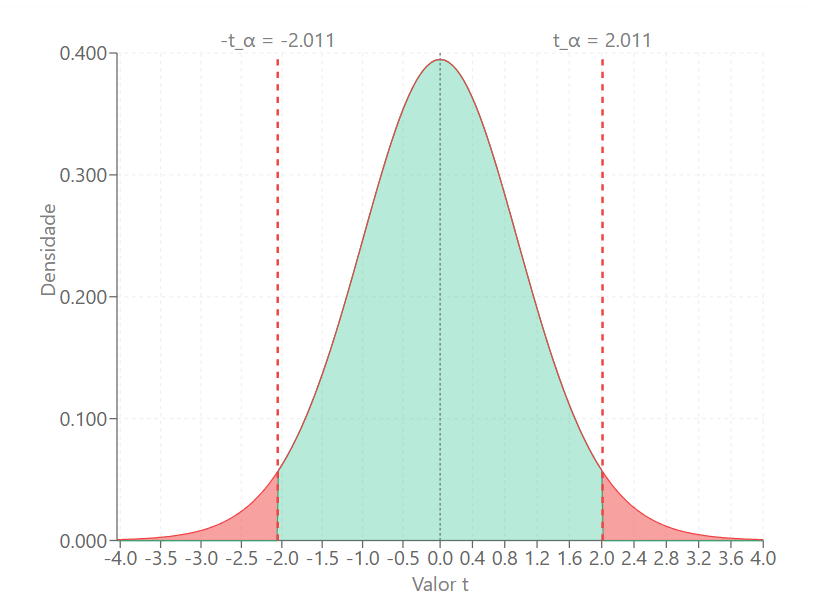

In [91]:
t_teste = resultado_regressao.tvalues[1] # os valores estatisticos da regreção linear
t_teste

/tmp/ipython-input-1645092406.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_teste = resultado_regressao.tvalues[1] # os valores estatisticos da regreção linear


np.float64(39.32813192675501)

- Onde o valor de T estatistico encontrado foi T_teste = 39.32

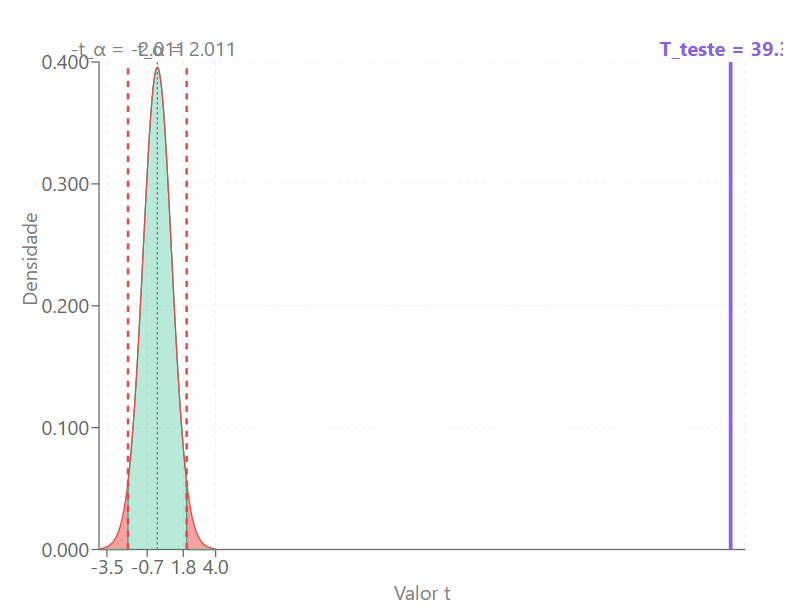

- REJEITAR H0 se t<= - T_alpha/ 2 ou se t>= T_alpha/2

In [92]:
t_teste <= - (t_alpha/2)

np.False_

In [93]:
t_teste >= t_alpha/2

np.True_

- O segundo teste foi true Logo, devemos Recusar a hipotese 0 (B1 = 0) , Logo B1 é deferente de 0 (Hipotese H1 aceita)

- Critério do p_valor:

- Rejeita p_valor se for menor que a significancia

In [94]:
p_valor = resultado_regressao.pvalues[1]
p_valor

/tmp/ipython-input-911925625.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = resultado_regressao.pvalues[1]


np.float64(3.5555432285859883e-38)

In [95]:
p_valor <= significancia

np.True_

- TRUE, LOGO DEVEMOS REJEITAR H0 E aceitar h1.

- **CONCLUIMOS QUE EXISTE UMA RELAÇÃO SIGNIFICATIVA ENTRE AS DUAS VARÁVEIS B1(COEFICIENTE ANGULAR) DIFERENTE DE 0**

In [96]:
print(resultado_regressao.summary()) #vemos todos os valores calculados acima

                            OLS Regression Results                            
Dep. Variable:                  GASTO   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           3.56e-38
Time:                        13:16:42   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

## 4.6. Teste F

------

O teste F é usado para comparar variâncias ou avaliar a significância de um modelo estatístico (especialmente em ANOVA e regressão).
Ele verifica se a variabilidade explicada pelo modelo é significativamente maior que a variabilidade não explicada (erro), ajudando a decidir se pelo menos um parâmetro ou grupo é diferente dos outros.

**Hipótese nula (H₀):**
Todas as variâncias são iguais  
ou  
O modelo não explica mais variabilidade que o acaso.
B1 = 0
**Hipótese alternativa (H₁):**
Pelo menos uma variância é diferente  
ou  
O modelo explica variabilidade significativamente maior que o acaso.
B1 é diferente de 0.

- Para achar a estatistica de teste: (f_teste)

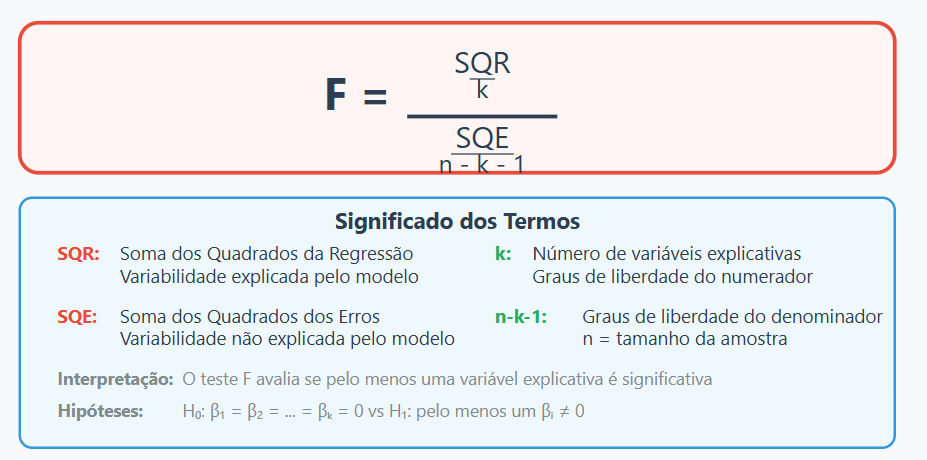

- Critério do valor crítico:  Rejeitar se F >= F_alpha
- Criterio do p valor : p_valor <-= signficancia

- ### **Calculando a estatistica de teste**

In [100]:
SQE = resultado_regressao.mse_model
SQR = resultado_regressao.mse_resid
print(SQE, SQD)

31739163.242480807 20520.54244831649


In [101]:
f_estatico = SQE/SQD
f_estatico

np.float64(1546.7019608482472)

- Conferindo no sumario:

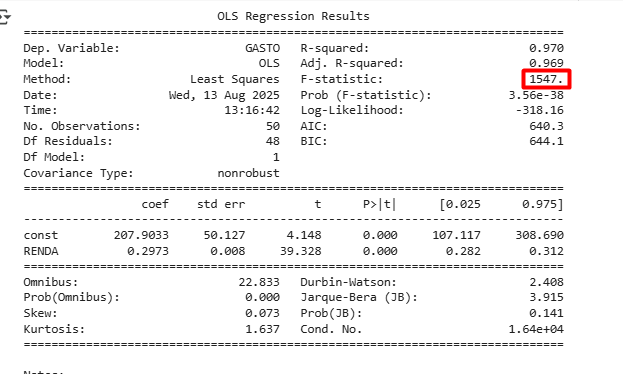

- Direto via python:

In [102]:
resultado_regressao.fvalue  # da o valor direto

np.float64(1546.7019608482472)

- ### **Achando o p valor**

In [104]:
p_valor = resultado_regressao.f_pvalue

In [106]:
significancia = 0.05
p_valor <= significancia

np.True_

- Ou seja devemos Rejeitar H0  e aceitar H1 que diz que 0 modelo explica variabilidade significativamente maior que o acaso.  

## 4.7. Outros testes
---

### 4.7.1. Teste Omnibus - Normalidade dos resíduos


------------

Se os resíduos forem normalmente distribuídos, isso indica que o erro do modelo se comporta de forma aleatória, sem viés sistemático, o que valida muitos pressupostos estatísticos.

Já se não forem normais, pode haver problemas como heterocedasticidade, não linearidade ou outliers influentes.

**H₀ (hipótese nula):**
Os resíduos seguem uma distribuição normal.

**H₁ (hipótese alternativa):**
Os resíduos não seguem uma distribuição normal.


- analisar os seguintes testes:

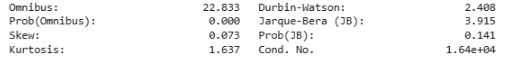

In [111]:
from scipy.stats import normaltest

valor_estatistico, p_valor = normaltest(dataset['Residuos regressão'])
print(valor_estatistico, p_valor)

22.8329680279357 1.1012451024593462e-05


- teste do p_valor:

In [112]:
p_valor <= significancia

np.True_

- Logo rejeitamos H0 e rejeitamos que o valor se distribui como uma normal segundo o teste de omnibus

- vendo o grafico:

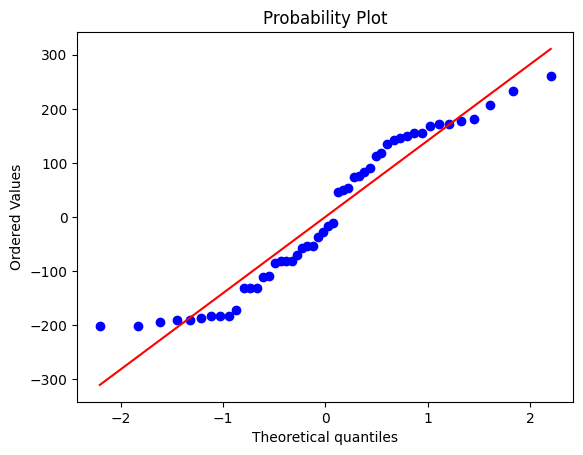

In [114]:
from scipy.stats import probplot
import pylab
probplot(dataset['Residuos regressão'], dist="norm", plot=pylab)
pylab.show()

- Quanto mais encima os pontos estiverem da reta mais se assemelha a uma normal. Logo vemos que os pontos estão um pouco longe
- Temos que levar em conta tambem que este teste é mais rigoroso.

-  testando uma variavel que sabemos que se comporta como uma normal para ver a diferença.

- A variável altura se comporta como uma normal.

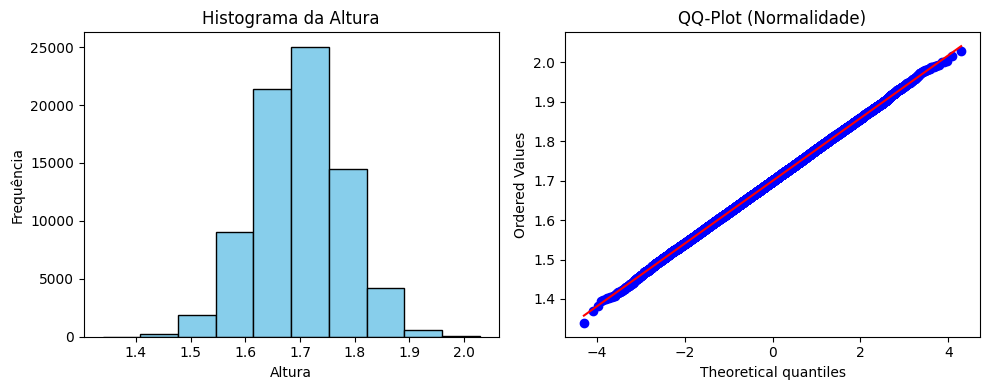

In [121]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Cria a figura com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histograma
axs[0].hist(dados.Altura, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Histograma da Altura')
axs[0].set_xlabel('Altura')
axs[0].set_ylabel('Frequência')

# QQ Plot
probplot(dados.Altura, dist="norm", plot=axs[1])
axs[1].set_title('QQ-Plot (Normalidade)')

plt.tight_layout()
plt.show()


-Vemos que praticamente todos os pontos ficam dentro da reta- mostrando que fica bem proximo de uma normal.

### 4.7.2. Skew

---------------

O teste de Skewness mede se a distribuição dos dados (ou resíduos) é simétrica em relação à média.
Um valor de assimetria diferente de zero indica que os dados estão puxados para a esquerda (negativa) ou para a direita (positiva).

**H₀ (hipótese nula):**
A distribuição dos resíduos é simétrica (assimetria = 0).

**H₁ (hipótese alternativa):**
A distribuição dos resíduos é assimétrica (assimetria ≠ 0).


In [124]:
from scipy.stats import skew, skewtest

# Suponha que 'residuos' seja um array ou série com os resíduos do modelo
valor_skew = skew(dataset['Residuos regressão']])
stat, p_valor = skewtest(dataset['Residuos regressão'])

print("Valor da skewness:", valor_skew)
print("Estatística do teste:", stat)
print("p-valor:", p_valor)

Valor da skewness: 0.07306920116444166
Estatística do teste: 0.2349807762191217
p-valor: 0.8142236538759056


In [125]:
p_valor <= significancia

np.False_

- logo aceitamos a hipotese H0, e conseguemente a ideia que a distribuição de resíduos é simétrica.

### 4.7.3. Kurtosis

-----

O teste de Kurtosis avalia a “pontudez” da distribuição dos resíduos, ou seja, se eles têm caudas mais pesadas ou mais leves do que uma distribuição normal.

**H₀ (hipótese nula):**
Os resíduos têm curtose igual à de uma distribuição normal (mesma pontudez).

**H₁ (hipótese alternativa):**
Os resíduos têm curtose diferente da de uma distribuição normal (mais ou menos pontudos que o normal).


In [126]:
from scipy.stats import kurtosis, kurtosistest

# Selecionar os resíduos
residuos = dataset['Residuos regressão']

# Valor da curtose
valor_kurt = kurtosis(residuos, fisher=True)  # fisher=True ajusta para curtose excessiva (0 para normal)
print("Valor da kurtose:", valor_kurt)

# Teste estatístico
stat, p_valor = kurtosistest(residuos)
print("Estatística do teste:", stat)
print("p-valor:", p_valor)

Valor da kurtose: -1.3630378419313565
Estatística do teste: -4.772604327067472
p-valor: 1.8185885039223454e-06


In [127]:
p_valor <= significancia

np.True_

- Logo rejeitamos nesse teste a hipotese H1 e a aceitamos que os residuos tem curtose diferente de uma normal (mais ou menos pontuda)

### 4.7.4. Teste de Jarque-Bera - Normalidade dos Resíduos

----

O teste de Jarque-Bera (JB) combina skewness e kurtosis para testar a normalidade dos resíduos de forma geral

**H₀ (hipótese nula):**  
Os resíduos seguem uma distribuição normal.

**H₁ (hipótese alternativa):**  
Os resíduos não seguem uma distribuição normal.


In [128]:
from scipy.stats import jarque_bera

# Selecionar os resíduos
residuos = dataset['Residuos regressão']

# Teste de Jarque-Bera
stat, p_valor = jarque_bera(residuos)
print("Estatística JB:", stat)
print("p-valor:", p_valor)


Estatística JB: 3.915059564941934
p-valor: 0.14120680197285554


In [129]:
p_valor <= significancia

np.False_

Falso, logo devemos aceita H0 e aceitar que se trata de uma normal

- conflitante com o resultado dos outros testes, isso acontece pq as vezes o modelo treinado se encontra no limite dos dois teste, o que gera esse conflito, em que uma afirma que nao se trata de uma normal e outro sim.